# 주성분 분석 (Principal Component Anaylsis; PCA)

<hr>

## ✅주성분 분석
- 고차원의 데이터를 저차원의 데이터로 차원 축소하는 알고리즘
- 주로 고차원의 데이터를 3차원 이하의 데이터로 바꿔서 시각화하는 데 많이 사용
- 유용한 정보만 살려서 적은 메모리에 저장하거나 데이터의 노이즈를 굴이고 싶을 때도 사용

<br>

#### 주성분 분석의 특징
- 데이터의 분산을 최대한 유지하면서 저차원으로 데이터를 변환하는 데 있음
- 분산을 유지하는 이유는 **데이터의 고유한 특성을 최대한 유지하기 위힘**

<br>

- 주성분 분석 알고리즘은 수학적인 방법으로 데이터 정보의 유실이 가장 적은 라인을 찾아냄
- 수학적으로 '데이터의 중첩이 가장 적다'라는 말은 **'데이터의 분산이 가장 크다'** 라는 말과 동일
- 주성분 분석은 분산이 가장 큰 차원을 선택해 고차원 데이터를 저차원으로 축소
- ![PCA](img/pca1.png)
- 분산이 가장 큰 차원은 수학적 공분산 행렬(covariance matrix)에서 고유값(eigen value)이 가장 큰 고유 벡터(eigen vector)임

<br>

- e.g. 데이터가 5차원 데이터이고, 2차원으로 데이터를 줄이고 싶다면 주성분 분석 알고리즘은 공분산 행렬에서 고유값이 큰 순서대로 고유벡터를 정렬한 후, 가장 큰 고유 벡터와 두 번째로 큰 고유 벡터를 축으로 2차원 데이터를 만들게 됨

<br><hr>

# 10. PCA
##### *고차원 데이터(식습관 데이터)를 1차원 데이터로 차원 축소시켜 시각화하기*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 01. 데이터 가져오기
##### *사람들의 하루 식습관 데이터를 만든 후, 주성분분석을 통해 데이터를 시각화* #####
- 칼로리 | 아침 | 점심 | 저녁 | 운동 횟수 | 체형

In [2]:
df = pd.DataFrame(columns=['칼로리', '아침', '점심', '저녁', '운동횟수', '체형'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df

,칼로리,아침,점심,저녁,운동횟수,체형
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


## 02. 데이터 전처리
##### *주성분 분석을 위해 데이터 전처리 과정이 필요함*
##### *가공 데이터에 데이터 특징과 클래스가 함께 있으므로, 데이터의 특징만으로 구성된 데이터프레임을 생성* 

In [3]:
# feature df
IV = ['칼로리', '아침', '점심', '저녁', '운동횟수']
X = df[IV]

# target df
DV = ['체형']
y = df[DV]

In [4]:
# 표준화: 다른 단위를 가진 측정값을 비교할 때, 분산을 극대화하는 성분에 관심이 있으므로 단위를 통일시켜주는 표준화가 필요함
from sklearn.preprocessing import StandardScaler

In [5]:
std_x = StandardScaler().fit_transform(X)
std_x

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## 03. scikit-learn으로 주성분 분성 구현

In [6]:
from sklearn import decomposition

In [7]:
pca = decomposition.PCA(n_components=1)    # "1"차원으로 축소
# 고유값과 고유벡터를 찾아 분산의 값이 최대가 되도록 함
pca

PCA(n_components=1)

In [8]:
# 표준화한 IV(std)를 학습에 사용
pca_x = pca.fit_transform(std_x)
pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [9]:
# 고차원 >> 1차원 시각화
result = pd.DataFrame(pca_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = y

result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


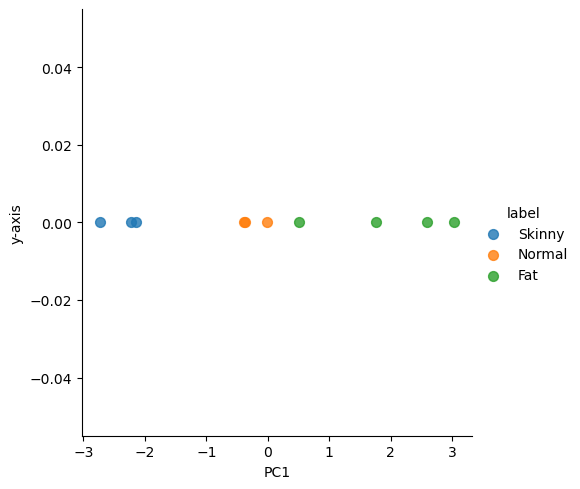

In [10]:
# 시각화
sns.lmplot(data=result,
           x='PC1',
           y='y-axis',
           fit_reg=False,
           scatter_kws={'s':50},
           hue='label')